In [189]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

dataFile = pd.read_csv('dataFiles/Fu_multifit.csv')
X = np.array([dataFile['Velocity'],dataFile['L/S']]).T
Y = np.array(dataFile['contact ratio']) / 100

In [190]:
reg = LinearRegression().fit(X,Y)
print(reg.score(X,Y))
reg.coef_

ValueError: illegal value in 4-th argument of internal None

In [181]:
X1 = [[2.5,0.08]]
plastic = reg.predict(X1)
print(plastic)

[0.05952281]


In [182]:
ratio = plastic/(1-plastic)
print(ratio)
print(reg.predict(X[0:7,:]))

[0.06329001]
[0.18852183 0.21256833 0.25302754 0.30056782 0.31830947 0.34569337
 0.37878411]


Text(0, 0.5, 'Contact ratio')

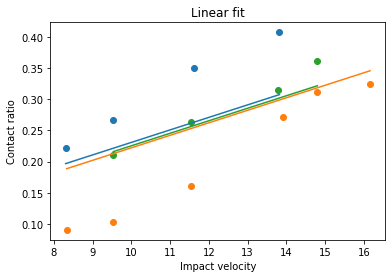

In [183]:
import matplotlib.pyplot as plt 
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],reg.predict(X[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],reg.predict(X[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],reg.predict(X[8:12,:]))
plt.title('Linear fit')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [184]:
#polynomial regression fit
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2,interaction_only=False)
X_poly = poly.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf = LinearRegression()
clf.fit(X_poly,Y)
mul_coeff = clf.coef_
print(clf.score(X_poly,Y))
print(mul_coeff)

0.9919677571129205
[ 0.00000000e+00  1.70578279e-02 -4.28364632e+00 -3.50458587e-04
  1.64273909e-01  2.00403193e+01]


Text(0, 0.5, 'Contact ratio')

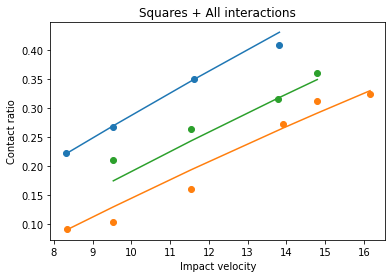

In [185]:
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf.predict(X_poly[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf.predict(X_poly[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf.predict(X_poly[8:12,:]))
plt.title('Squares + All interactions')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

0.9890250440724381
[ 0.         -0.0267725  -0.92390284  0.40204208]


Text(0, 0.5, 'Contact ratio')

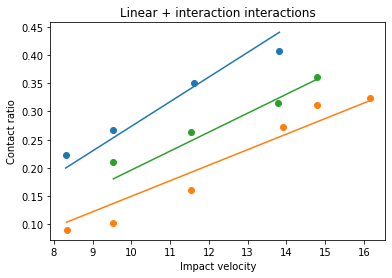

In [186]:
poly1 = PolynomialFeatures(2,interaction_only=True)
X_poly1 = poly1.fit_transform(X)
# predict_poly = poly.fit_transform(Y)
clf1 = LinearRegression()
clf1.fit(X_poly1,Y)
mul_coeff = clf1.coef_
print(clf1.score(X_poly1,Y))
print(mul_coeff)
plt.scatter(X[13:17,0],Y[13:17])
plt.plot(X[13:17,0],clf1.predict(X_poly1[13:17,:]))
plt.scatter(X[0:6,0],Y[0:6])
plt.plot(X[0:6,0],clf1.predict(X_poly1[0:6,:]))
plt.scatter(X[8:12,0],Y[8:12])
plt.plot(X[8:12,0],clf1.predict(X_poly1[8:12,:]))
plt.title('Linear + interaction interactions')
plt.xlabel('Impact velocity')
plt.ylabel('Contact ratio')

In [187]:
datafile = pd.read_csv('dataFiles/test_data1_WithOutputs_withCalculatedValues.csv')
numer = (datafile['DetTorque']*datafile['RPM (1/s)']) / (datafile['FlowRate (kg/hr)']*datafile['DetMRT']*(datafile['Vol free']/datafile['Vol max']))
datafile['velocity'] = np.sqrt(2*np.array(numer))
velocity = datafile['velocity']
lsratio = datafile['L/S Ratio']
inputframes = [velocity,lsratio]
inputframes = pd.concat(inputframes,axis=1)
X_poly_new = poly1.fit_transform(inputframes)
pre = np.abs(clf1.predict(X_poly_new))
ratio = pre/(1-pre)
print(ratio)
poly1.get_feature_names(inputframes.columns)

[6.73799487e-02 6.39558564e-02 6.11081329e-02 6.79981132e-02
 6.72102498e-02 6.45865277e-02 6.68167838e-02 7.02553940e-02
 6.81930238e-02 6.61277475e-02 5.87215963e-02 5.32674368e-02
 6.65729665e-02 6.50592715e-02 6.07437800e-02 6.71867358e-02
 7.04032335e-02 6.77398540e-02 6.17449463e-02 5.45448748e-02
 4.87817775e-02 6.57064977e-02 6.32092596e-02 6.00227462e-02
 6.40219271e-02 6.66956715e-02 6.74251967e-02 6.32480640e-02
 5.94685590e-02 5.62436265e-02 7.52957587e-02 6.96300731e-02
 6.68049061e-02 6.50887628e-02 6.59028654e-02 6.20279564e-02
 5.95165221e-02 5.41081650e-02 4.93328334e-02 6.04572961e-02
 6.14942966e-02 5.70177380e-02 5.39877178e-02 6.03897760e-02
 5.81637064e-02 5.56291238e-02 4.86640804e-02 4.17161148e-02
 5.18151811e-02 5.37807903e-02 4.95623721e-02 5.21785780e-02
 5.29498991e-02 5.54453558e-02 3.23747712e-01 2.97271524e-01
 9.69990313e-01 2.73461387e-01 2.58165456e-01 5.66695418e-01
 2.63487451e-01 1.65092879e-01 2.54544561e-01 3.35246480e-02
 4.66106782e-02 2.254140

['1', 'velocity', 'L/S Ratio', 'velocity L/S Ratio']

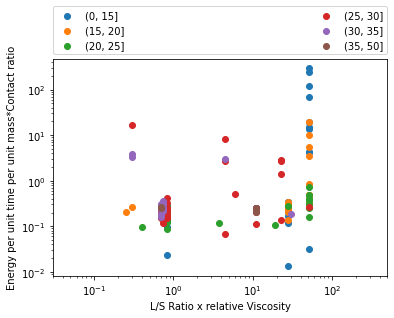

In [191]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass*Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [176]:
X_poly_new = poly.fit_transform(inputframes)
pre = np.abs(clf.predict(X_poly_new))
ratio = pre/(1-pre)
print(ratio)
poly.get_feature_names(inputframes.columns)

[ 1.80665624e-01  1.58825792e-01  1.41385502e-01  1.84713817e-01
  1.79560059e-01  1.62775594e-01  1.77006138e-01  1.99780311e-01
  1.85997087e-01  1.79373622e-01  1.50991112e-01  1.30990470e-01
  1.81126618e-01  1.75188703e-01  1.58597594e-01  1.83552192e-01
  1.96435179e-01  1.85746993e-01  1.68073476e-01  1.47849156e-01
  1.32118650e-01  1.79481054e-01  1.72266521e-01  1.63176923e-01
  1.74605463e-01  1.82361216e-01  1.84493590e-01  1.54431199e-01
  1.31628834e-01  1.13018856e-01  2.35113352e-01  1.95561243e-01
  1.76929247e-01  1.65944213e-01  1.71124605e-01  1.46949171e-01
  1.53968677e-01  1.34025422e-01  1.17013145e-01  1.57513558e-01
  1.61447639e-01  1.44663154e-01  1.33589559e-01  1.57258376e-01
  1.48911059e-01  1.50853557e-01  1.31801525e-01  1.13366682e-01
  1.40348668e-01  1.45740543e-01  1.34226046e-01  1.41341990e-01
  1.43455620e-01  1.50343331e-01  7.11346312e+00  6.48951255e+00
 -2.65134467e+01  5.98636589e+00  5.68831845e+00  2.08092545e+01
  5.78993714e+00  4.20506

['1',
 'velocity',
 'L/S Ratio',
 'velocity^2',
 'velocity L/S Ratio',
 'L/S Ratio^2']

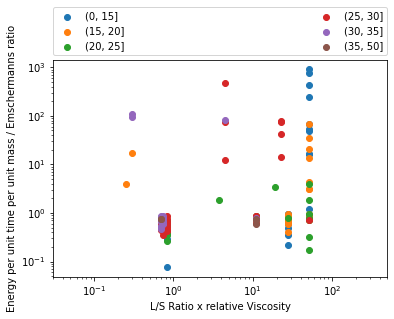

In [177]:
fig,ax = plt.subplots()
datafile['numer'] = numer*pre
ranges = [0,15,20,25,30,35,50]
groups = datafile.groupby(pd.cut(datafile['Extent of gran'],ranges))
for val, group in groups:
    ax.scatter(group['L/S Ratio']*group['Binder Viscosity (mPa.s)'] / 0.001, group['numer'],label=val)
plt.xlabel('L/S Ratio x relative Viscosity')
plt.ylabel('Energy per unit time per unit mass *Contact ratio')
plt.xscale("log")
plt.yscale("log")
plt.xlim([3e-2,500])
plt.xticks([1e-1,1e0,1e1,1e2])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

In [178]:
print(1/ratio)


[ 5.53508730e+00  6.29620659e+00  7.07286096e+00  5.41378016e+00
  5.56916726e+00  6.14342715e+00  5.64952159e+00  5.00549828e+00
  5.37642829e+00  5.57495573e+00  6.62290639e+00  7.63414318e+00
  5.52099968e+00  5.70813062e+00  6.30526589e+00  5.44804171e+00
  5.09073784e+00  5.38366725e+00  5.94977878e+00  6.76365038e+00
  7.56895409e+00  5.57161872e+00  5.80495848e+00  6.12831756e+00
  5.72719766e+00  5.48362213e+00  5.42024252e+00  6.47537548e+00
  7.59711965e+00  8.84808103e+00  4.25326760e+00  5.11348764e+00
  5.65197680e+00  6.02612155e+00  5.84369502e+00  6.80507410e+00
  6.49482752e+00  7.46127106e+00  8.54604836e+00  6.34865985e+00
  6.19395866e+00  6.91261022e+00  7.48561494e+00  6.35896175e+00
  6.71541797e+00  6.62894545e+00  7.58716562e+00  8.82093380e+00
  7.12511217e+00  6.86150868e+00  7.45011891e+00  7.07503837e+00
  6.97079694e+00  6.65144237e+00  1.40578504e-01  1.54094779e-01
 -3.77167107e-02  1.67046255e-01  1.75798878e-01  4.80555419e-02
  1.72713447e-01  2.37808